[**Demo %s**](#demo-laplace-fd)

We make a crude discretization for illustrative purposes.

In [2]:
m = 6;  n = 5;
[x, Dx, Dxx] = diffmat2(m, [0, 3]);
[y, Dy, Dyy] = diffmat2(n, [-1, 1]);
[mtx, X, Y, vec, unvec, is_boundary] = tensorgrid(x, y);

Next, we define $\phi$ and evaluate it on the grid to get the forcing vector of the linear system.

In [3]:
phi = @(x, y) x.^2 - y + 2;
b = vec(mtx(phi));

Here are the coefficients for the PDE collocation, before any modifications are made for the boundary conditions. The combination of Kronecker products and finite differences produces a characteristic sparsity pattern.

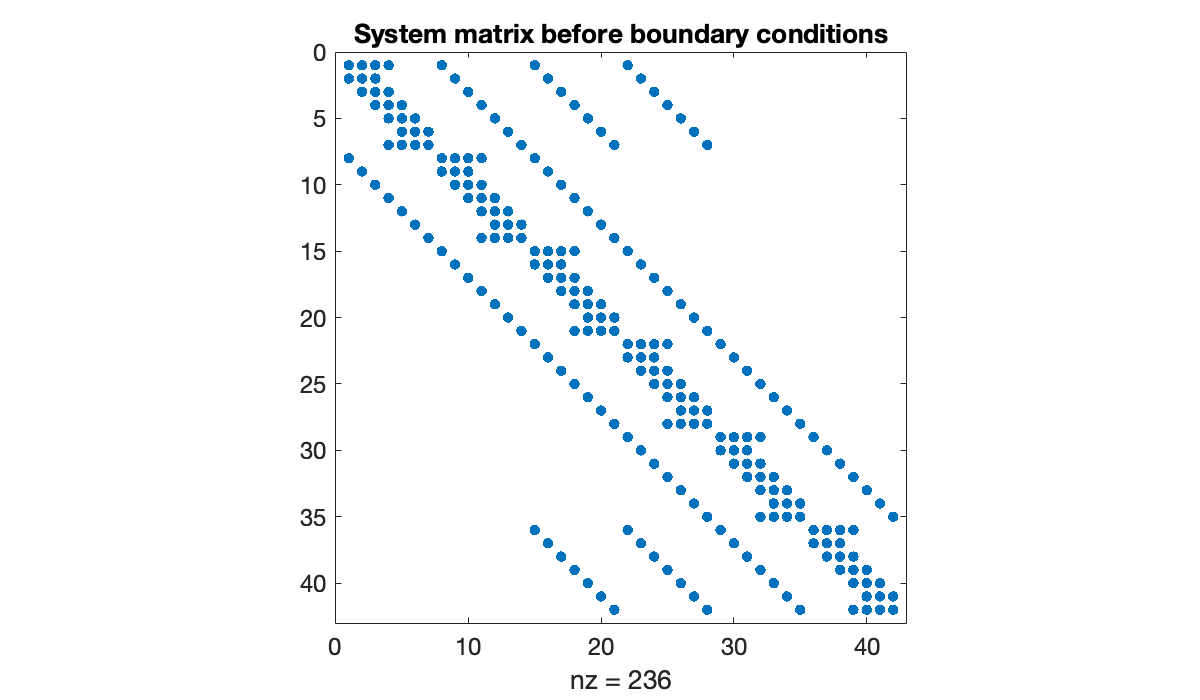

In [4]:
A = kron(speye(n+1), sparse(Dxx)) + kron(sparse(Dyy), speye(m+1));
clf,  spy(A)
title("System matrix before boundary conditions")

The number of equations is equal to $(m+1)(n+1)$, which is the total number of points on the grid.

In [5]:
N = length(b)

N = 42

We now use the Boolean array that indicates where the boundary points lie in the grid.

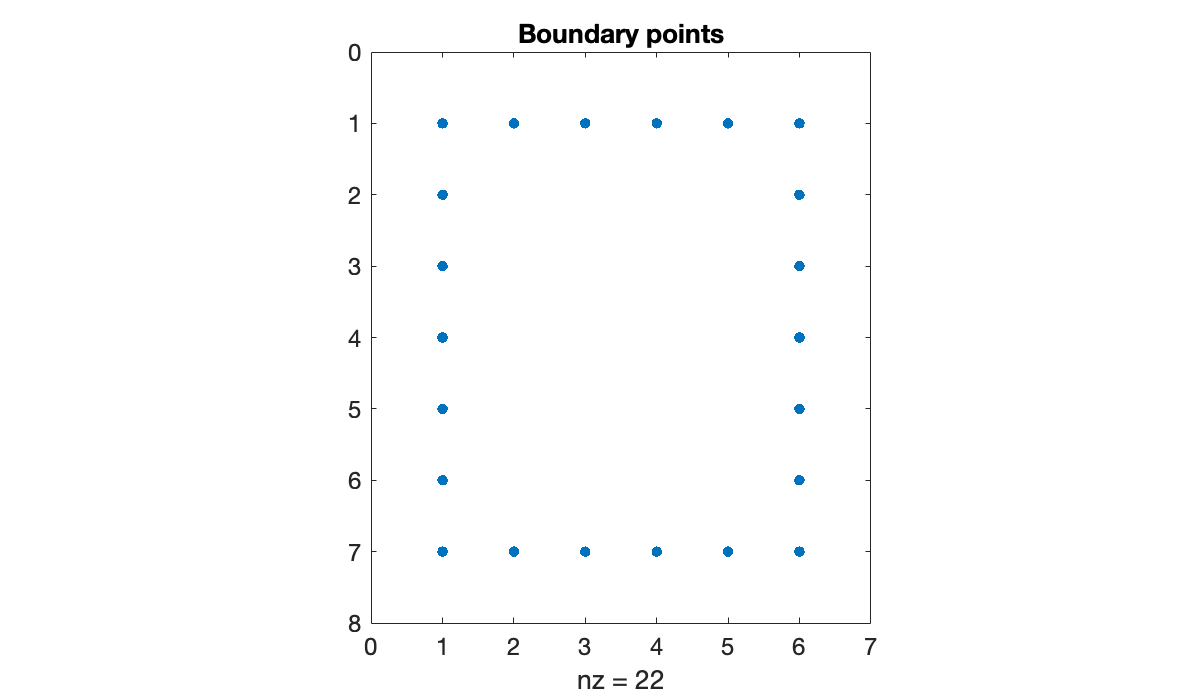

In [6]:
spy(is_boundary)
title("Boundary points")

In order to impose Dirichlet boundary conditions, we replace the boundary rows of the system by rows of the identity.
```{tip}
:class: dropdown
Changing rows of a sparse array requires that the operands be in a particular sparse representation called `lil`. The conversion isn't done automatically because it can be slow and you are encouraged to avoid it when possible. We're just trying to keep things conceptually simple here.
```

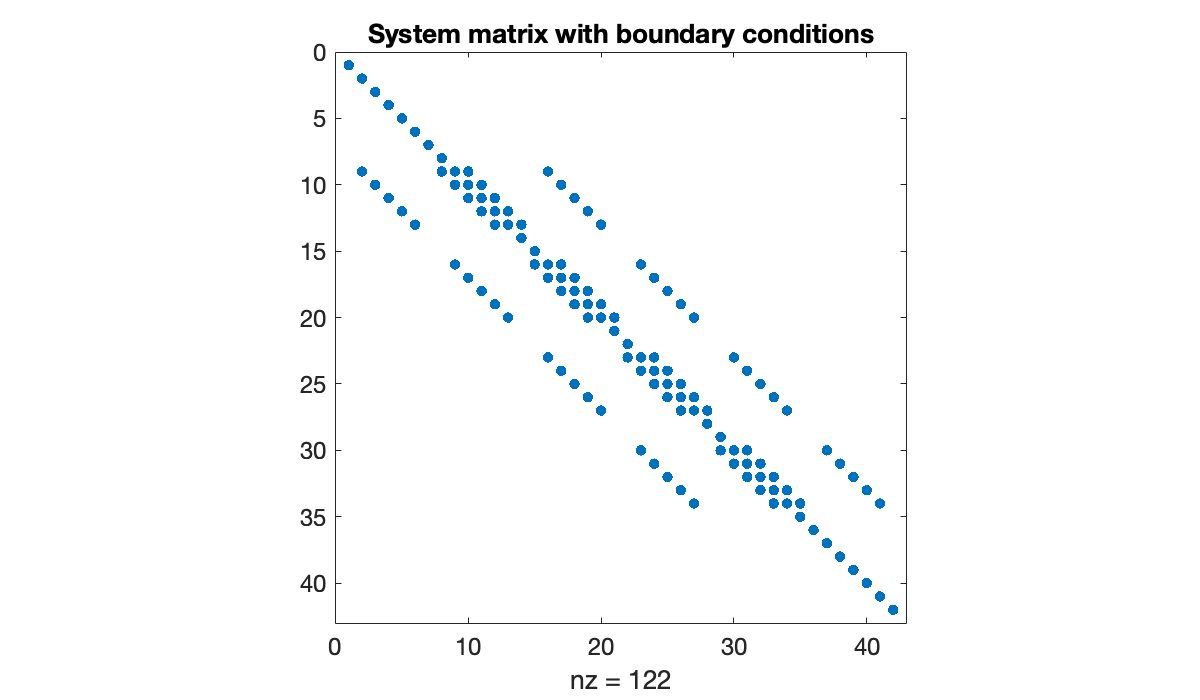

In [7]:
I = speye(N);
idx = vec(is_boundary);
A(idx, :) = I(idx, :);

spy(A)
title("System matrix with boundary conditions")

Finally, we must replace the rows in the vector $\mathbf{b}$ by the boundary values being assigned to the boundary points. Here, we let the boundary values be zero everywhere.

In [8]:
b(idx) = 0;

Now we can solve for $\mathbf{u}$ and reinterpret it as the matrix-shaped $\mathbf{U}$, the solution on our grid.

In [9]:
u = A \ b;
U = unvec(u)

U = 7×6 double
         0         0         0         0         0         0
         0   -0.5493   -0.7583   -0.7121   -0.4534         0
         0   -0.9179   -1.3027   -1.2438   -0.7985         0
         0   -1.2193   -1.7406   -1.6791   -1.0954         0
         0   -1.3987   -1.9768   -1.9179   -1.2793         0
         0   -1.2102   -1.6584   -1.6123   -1.1143         0
         0         0         0         0         0         0